In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# Load the dataset from CSV file
projectPath_save = projectPath_save = "./save/"
projectPath = "./data/"
file_path = projectPath+ "timeVideo2.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df

,TIME,behaviour
0,00:00:00,NaN
1,00:00:15,NaN
2,00:00:30,NaN
3,00:00:45,NaN
4,00:01:00,NaN
...,...,...
563,02:20:45,NaN
564,02:21:00,NaN
565,02:21:15,NaN
566,02:21:30,NaN


**Remove sequences of same behaviour**

In [ ]:
df['behaviour_next'] = df['behaviour'].shift(-1)
df = df[df['behaviour'] != df['behaviour_next']]
df = df.drop('behaviour_next', axis=1)

In [ ]:
#Remove NaN
df = df[df['behaviour'].notna()]

In [ ]:
print(df)

         TIME behaviour
38   00:09:30      ROLL
43   00:10:45        LF
54   00:13:30  NIP_CORE
83   00:20:45        LF
91   00:22:45      ROLL
96   00:24:00      BEND
106  00:26:30        LF
114  00:28:30      BEND
119  00:29:45  DAN_CIRC
127  00:31:45      BEND
142  00:35:30        LF
167  00:41:45    H_DOWN
176  00:44:00      INSF
184  00:46:00  NIP_CORE
205  00:51:15      ROLL
212  00:53:00  BEND_OPP
232  00:58:00  BEND_OPP
269  01:07:15      ROLL
276  01:09:00        LF
292  01:13:00      ROLL
323  01:20:45      BEND
330  01:22:30      BEND
340  01:25:00      BEND
363  01:30:45      BEND
372  01:33:00  DAN_CIRC
373  01:33:15        GB
377  01:34:15       SPA
387  01:36:45       SPA
397  01:39:15       SPA
414  01:43:30       SPA
438  01:49:30      INSF
454  01:53:30  NIP_CORE
458  01:54:30    H_DOWN
463  01:55:45      ROLL
468  01:57:00      BEND
483  02:00:45      ROLL
486  02:01:30      BEND
491  02:02:45  DAN_CIRC
495  02:03:45      BEND
503  02:05:45        LF
504  02:06:00   

In [ ]:
# Calculate transitions
transitions = list(zip(df['behaviour'], df['behaviour'].shift(-1)))
transitions = [t for t in transitions if pd.notnull(t[1])]

In [ ]:
transitions

[('ROLL', 'LF'),
 ('LF', 'NIP_CORE'),
 ('NIP_CORE', 'LF'),
 ('LF', 'ROLL'),
 ('ROLL', 'BEND'),
 ('BEND', 'LF'),
 ('LF', 'BEND'),
 ('BEND', 'DAN_CIRC'),
 ('DAN_CIRC', 'BEND'),
 ('BEND', 'LF'),
 ('LF', 'H_DOWN'),
 ('H_DOWN', 'INSF'),
 ('INSF', 'NIP_CORE'),
 ('NIP_CORE', 'ROLL'),
 ('ROLL', 'BEND_OPP'),
 ('BEND_OPP', 'BEND_OPP'),
 ('BEND_OPP', 'ROLL'),
 ('ROLL', 'LF'),
 ('LF', 'ROLL'),
 ('ROLL', 'BEND'),
 ('BEND', 'BEND'),
 ('BEND', 'BEND'),
 ('BEND', 'BEND'),
 ('BEND', 'DAN_CIRC'),
 ('DAN_CIRC', 'GB'),
 ('GB', 'SPA'),
 ('SPA', 'SPA'),
 ('SPA', 'SPA'),
 ('SPA', 'SPA'),
 ('SPA', 'INSF'),
 ('INSF', 'NIP_CORE'),
 ('NIP_CORE', 'H_DOWN'),
 ('H_DOWN', 'ROLL'),
 ('ROLL', 'BEND'),
 ('BEND', 'ROLL'),
 ('ROLL', 'BEND'),
 ('BEND', 'DAN_CIRC'),
 ('DAN_CIRC', 'BEND'),
 ('BEND', 'LF'),
 ('LF', 'BEND'),
 ('BEND', 'DAN_CIRC'),
 ('DAN_CIRC', 'BEND'),
 ('BEND', 'SPA'),
 ('SPA', 'SPA'),
 ('SPA', 'DAN_CIRC'),
 ('DAN_CIRC', 'LF'),
 ('LF', 'MAF'),
 ('MAF', 'BN')]

In [ ]:
# Find all unique behaviours
unique_behaviors = df['behaviour'].unique()
print(unique_behaviors)
print(len(unique_behaviors))

['ROLL' 'LF' 'NIP_CORE' 'BEND' 'DAN_CIRC' 'H_DOWN' 'INSF' 'BEND_OPP' 'GB'
 'SPA' 'MAF' 'BN']
12


In [ ]:
# Initialize transition matrix
transition_matrix = pd.DataFrame(0, index=unique_behaviors, columns=unique_behaviors)

In [ ]:
# Fill transition matrix
for (current_behavior, next_behavior) in transitions:
    transition_matrix.loc[current_behavior, next_behavior] += 1



In [ ]:
transition_matrix

,ROLL,LF,NIP_CORE,BEND,DAN_CIRC,H_DOWN,INSF,BEND_OPP,GB,SPA,MAF,BN
ROLL,0,2,0,4,0,0,0,1,0,0,0,0
LF,2,0,1,2,0,1,0,0,0,0,1,0
NIP_CORE,1,1,0,0,0,1,0,0,0,0,0,0
BEND,1,3,0,3,4,0,0,0,0,1,0,0
DAN_CIRC,0,1,0,3,0,0,0,0,1,0,0,0
H_DOWN,1,0,0,0,0,0,1,0,0,0,0,0
INSF,0,0,2,0,0,0,0,0,0,0,0,0
BEND_OPP,1,0,0,0,0,0,0,1,0,0,0,0
GB,0,0,0,0,0,0,0,0,0,1,0,0
SPA,0,0,0,0,1,0,1,0,0,4,0,0


In [ ]:
# Normalize matrix to get probabilities
transition_matrix_normalized = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

In [ ]:
transition_matrix_normalized

,ROLL,LF,NIP_CORE,BEND,DAN_CIRC,H_DOWN,INSF,BEND_OPP,GB,SPA,MAF,BN
ROLL,0.000000,0.285714,0.000000,0.571429,0.000000,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,0.0
LF,0.285714,0.000000,0.142857,0.285714,0.000000,0.142857,0.000000,0.000000,0.0,0.000000,0.142857,0.0
NIP_CORE,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.0
BEND,0.083333,0.250000,0.000000,0.250000,0.333333,0.000000,0.000000,0.000000,0.0,0.083333,0.000000,0.0
DAN_CIRC,0.000000,0.200000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.0
H_DOWN,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.0
INSF,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
BEND_OPP,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.000000,0.000000,0.0
GB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
SPA,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.0,0.666667,0.000000,0.0


**Visualize transition matrix for all behaviours**

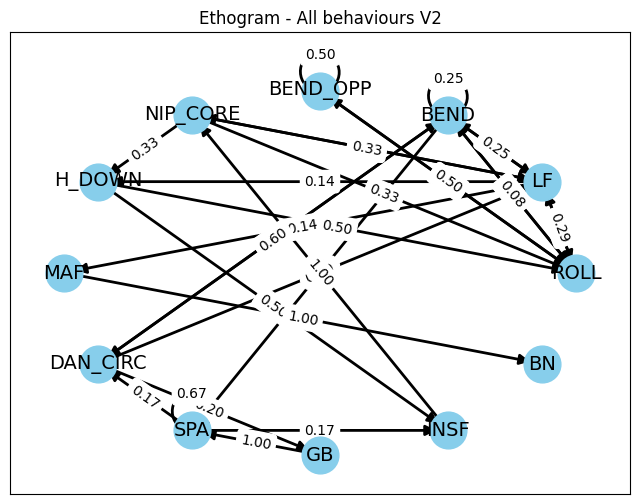

In [ ]:
# Create graph
G = nx.DiGraph()

# Add nodes and arches with weights
for i in range(len(transition_matrix_normalized)):
    for j in range(len(transition_matrix_normalized.columns)):
        if transition_matrix_normalized.iloc[i, j] > 0:
            G.add_edge(transition_matrix_normalized.index[i],
                       transition_matrix_normalized.columns[j],
                       weight=transition_matrix_normalized.iloc[i, j])

# Define layout
pos = nx.circular_layout(G)
plt.figure(figsize=(8, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')

# Draw arches
nx.draw_networkx_edges(G, pos, width=2, arrowstyle='-|>', arrowsize=15)

# Draw labels at nodes
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

# Draw labels at arches
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Ethogram - All behaviours V2')
#Save image
#plt.savefig(projectPath_save + 'EthogramV2.png
plt.show()


**select behaviours of interest**

In [ ]:
# Define the behaviors of interest for ethogram and Markov chain
behaviors_of_interest = ['BEND', 'DAN_CIRC', 'GB', 'SPA']

**Filter normalized matrix**

In [ ]:
# Filter normalized matrix for behaviour of interest
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[behaviors_of_interest, behaviors_of_interest]

print(filtered_transition_matrix_normalizedBI)


          BEND  DAN_CIRC   GB       SPA
BEND      0.25  0.333333  0.0  0.083333
DAN_CIRC  0.60  0.000000  0.2  0.000000
GB        0.00  0.000000  0.0  1.000000
SPA       0.00  0.166667  0.0  0.666667


**Slightly different visualizations to choose from**

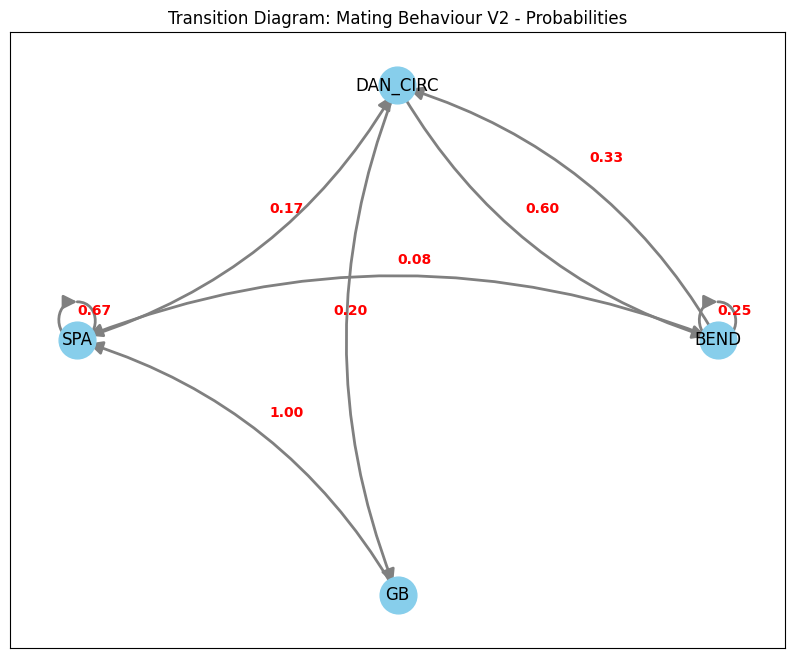

In [ ]:
# Graph
G_filtered = nx.DiGraph()


for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # add arch with weight (transition probability)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Position circular nodes
pos_filtered = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Draw curving arches and arrow points
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modify position to draw curving arches
    rad = 0.2 if u != v else 0.0  # rad=0.2 for curve, rad=0 for self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Add labels to nodes
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Add labels to arches with probability
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calculate mean position between strating and ending nodes
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2 +0.1
    # Apply shift to avoid overlapping
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Title
plt.title('Transition Diagram: Mating Behaviour V2 - Probabilities')

#Save image
#plt.savefig(projectPath_save + '01MatingBehaviourV2.png')
#plt.savefig(projectPath_save + '01MatingBehaviourV2.pdf')
#plt.savefig(projectPath_save + '01MatingBehaviourV2.svg')


plt.show()


<ipython-input-21-dec19cc88b0d>:29: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


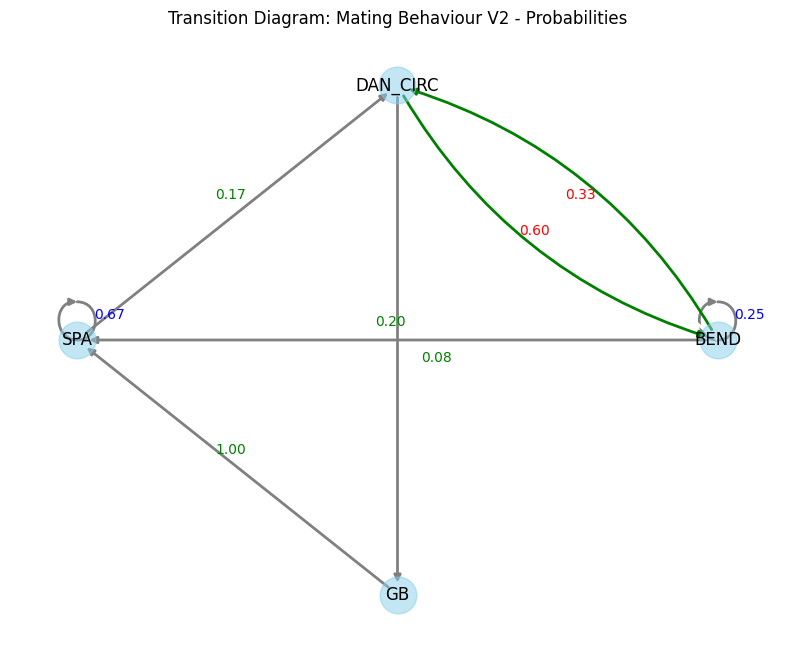

In [ ]:
# Create graph
G_filtered = nx.DiGraph()


for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:

            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)


pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))


nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)


for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')


nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')


edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Label arches
for (u, v), label in edge_labels.items():
    if u == v:  # Check for self-loop
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Check for two-direction arches
            # label for bending arch u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # label for one-direction arch
            plt.text((pos[u][0] + pos[v][0] + 0.1) / 2 + 0.1 * np.sin(np.radians(angle)), (pos[u][1] + pos[v][1]) / 2 +0.1 * np.cos(np.radians(angle)),
                     label, color='green', ha='center', va='center')


plt.title('Transition Diagram: Mating Behaviour V2 - Probabilities')
plt.axis('off')  # Deactivate axis

#Save image
#plt.savefig(projectPath_save + '02MatingBehaviourV2.png')
#plt.savefig(projectPath_save + '02MatingBehaviourV2.pdf')
#plt.savefig(projectPath_save + '02MatingBehaviourV2.svg')


plt.show()



**Grouping behaviours for categories**

**COURTSHIP**

In [ ]:
#Removing "['BK_SW', 'H_UP', 'UP'] not in index"
Courtship_all = ['BEND', 'DAN_CIRC', 'ROLL', 'GB', 'LF', 'BEND_OPP', 'H_DOWN', 'MAF', 'INSF']
Courtship_last = ['BEND', 'DAN_CIRC', 'GB', 'SPA']  #same as mating behaviour


In [ ]:
# Filter matrix on behaviours of interest
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Courtship_all, Courtship_all]

print(filtered_transition_matrix_normalizedBI)


              BEND  DAN_CIRC      ROLL   GB        LF  BEND_OPP    H_DOWN  \
BEND      0.250000  0.333333  0.083333  0.0  0.250000  0.000000  0.000000   
DAN_CIRC  0.600000  0.000000  0.000000  0.2  0.200000  0.000000  0.000000   
ROLL      0.571429  0.000000  0.000000  0.0  0.285714  0.142857  0.000000   
GB        0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
LF        0.285714  0.000000  0.285714  0.0  0.000000  0.000000  0.142857   
BEND_OPP  0.000000  0.000000  0.500000  0.0  0.000000  0.500000  0.000000   
H_DOWN    0.000000  0.000000  0.500000  0.0  0.000000  0.000000  0.000000   
MAF       0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
INSF      0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

               MAF  INSF  
BEND      0.000000   0.0  
DAN_CIRC  0.000000   0.0  
ROLL      0.000000   0.0  
GB        0.000000   0.0  
LF        0.142857   0.0  
BEND_OPP  0.000000   0.0  
H_DOWN    0.000000   0.5  
MAF       0.0

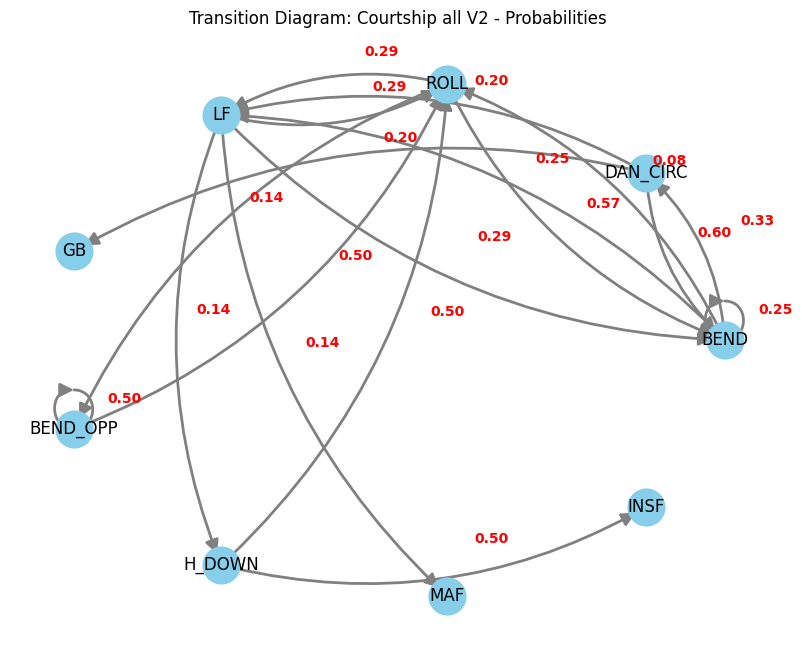

In [ ]:
# Graph
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2 +0.1
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2 +0.1
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Courtship all V2 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#Save image
#plt.savefig(projectPath_save + '01Courtship_allV2.png')
#plt.savefig(projectPath_save + '01Courtship_allV2.pdf')
#plt.savefig(projectPath_save + '01Courtship_allV2.svg')

# Mostra il grafico
plt.show()


<ipython-input-25-b2c1f9a5f850>:29: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


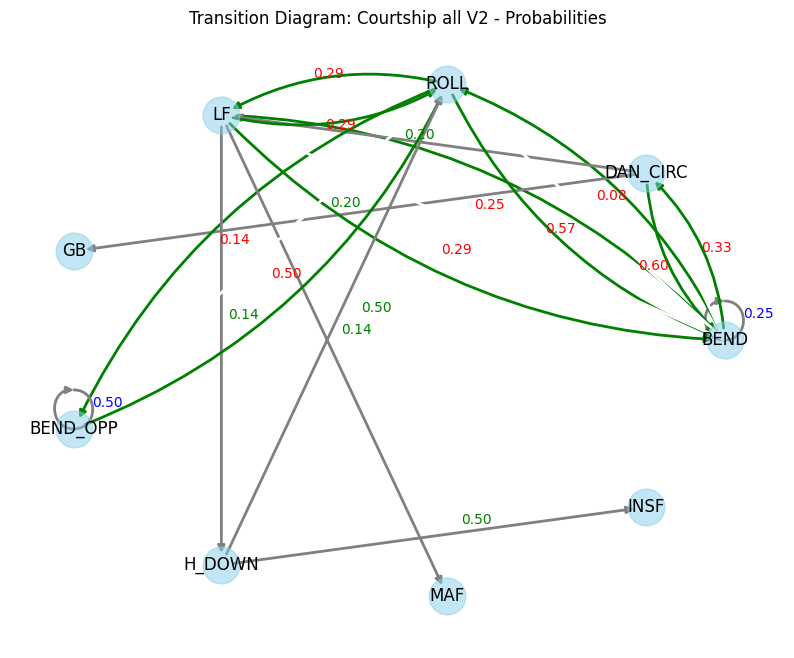

In [ ]:
# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0] + 0.1) / 2 + 0.1 * np.sin(np.radians(angle)), (pos[u][1] + pos[v][1]) / 2 +0.1 * np.cos(np.radians(angle)),
                     label, color='green', ha='center', va='center')

# Titolo e visualizzazione del grafo
plt.title('Transition Diagram: Courtship all V2 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#Save image
#plt.savefig(projectPath_save + '02Courtship_allV2.png')
#plt.savefig(projectPath_save + '02Courtship_allV2.pdf')
#plt.savefig(projectPath_save + '02Courtship_allV2.svg')

# Mostra il grafico
plt.show()


In [ ]:
#Courtship_few = ['BEND', 'DAN_CIRC', 'ROLL', 'GB', 'LF']
Courtship_first = ['ROLL', 'INSF', 'NIP_CORE', 'BEND', 'LF']

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Courtship_first, Courtship_first]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


              ROLL    H_DOWN  INSF  NIP_CORE      BEND        LF
ROLL      0.000000  0.000000   0.0  0.000000  0.571429  0.285714
H_DOWN    0.500000  0.000000   0.5  0.000000  0.000000  0.000000
INSF      0.000000  0.000000   0.0  1.000000  0.000000  0.000000
NIP_CORE  0.333333  0.333333   0.0  0.000000  0.000000  0.333333
BEND      0.083333  0.000000   0.0  0.000000  0.250000  0.250000
LF        0.285714  0.142857   0.0  0.142857  0.285714  0.000000


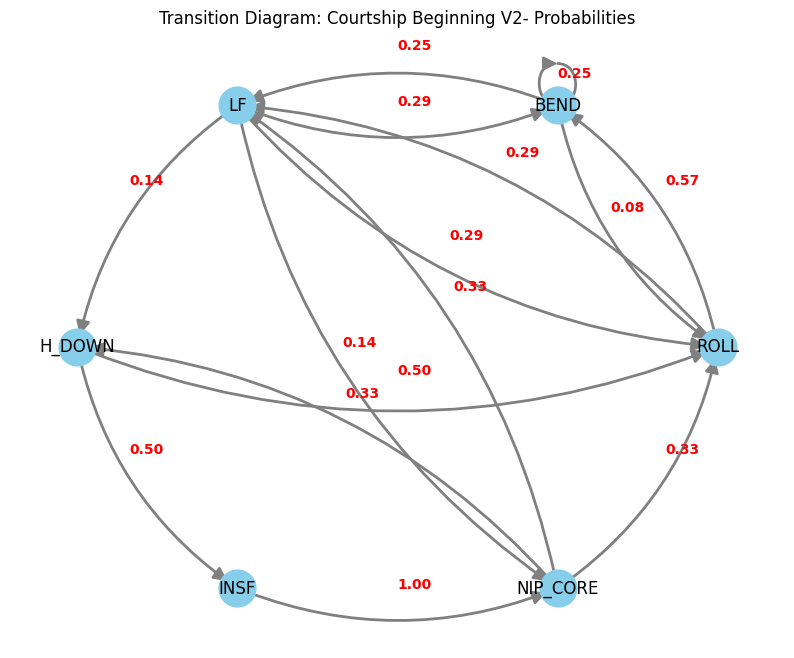

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2 +0.1
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Courtship Beginning V2- Probabilities')
plt.axis('off')  # Disattiva gli assi

#Save image
#plt.savefig(projectPath_save + '01Courtship_beginV2.png')
#plt.savefig(projectPath_save + '01Courtship_beginV2.pdf')
#plt.savefig(projectPath_save + '01Courtship_beginV2.svg')

# Mostra il grafico
plt.show()

<ipython-input-29-6664590eb25e>:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


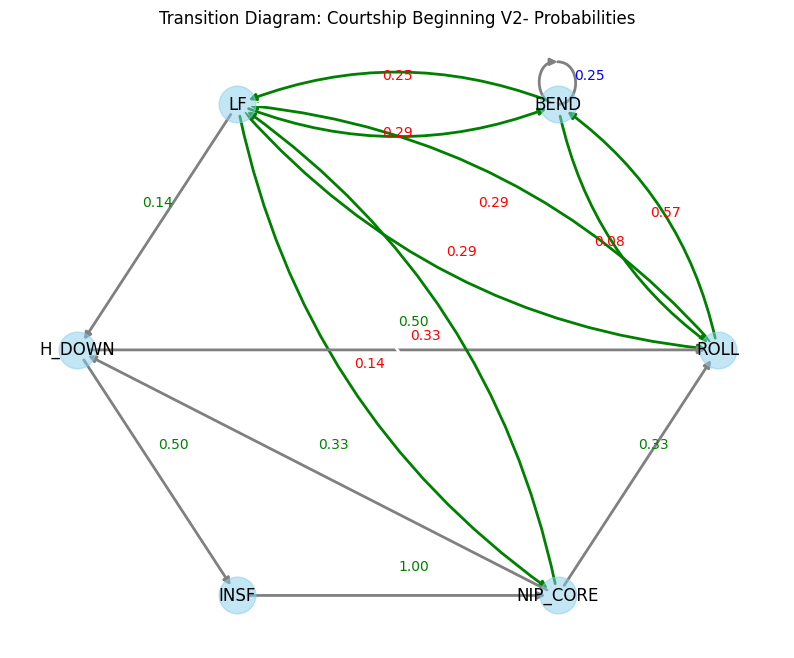

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0] + 0.1) / 2 + 0.1 * np.sin(np.radians(angle)), (pos[u][1] + pos[v][1]) / 2 +0.1 * np.cos(np.radians(angle)),
                     label, color='green', ha='center', va='center')

# Titolo e visualizzazione del grafo

plt.title('Transition Diagram: Courtship Beginning V2- Probabilities')
plt.axis('off')  # Disattiva gli assi

#Save image
#plt.savefig(projectPath_save + '02Courtship_beginV2.png')
#plt.savefig(projectPath_save + '02Courtship_beginV2.pdf')
plt.savefig(projectPath_save + '02Courtship_beginV2.svg')

# Mostra il grafico
plt.show()


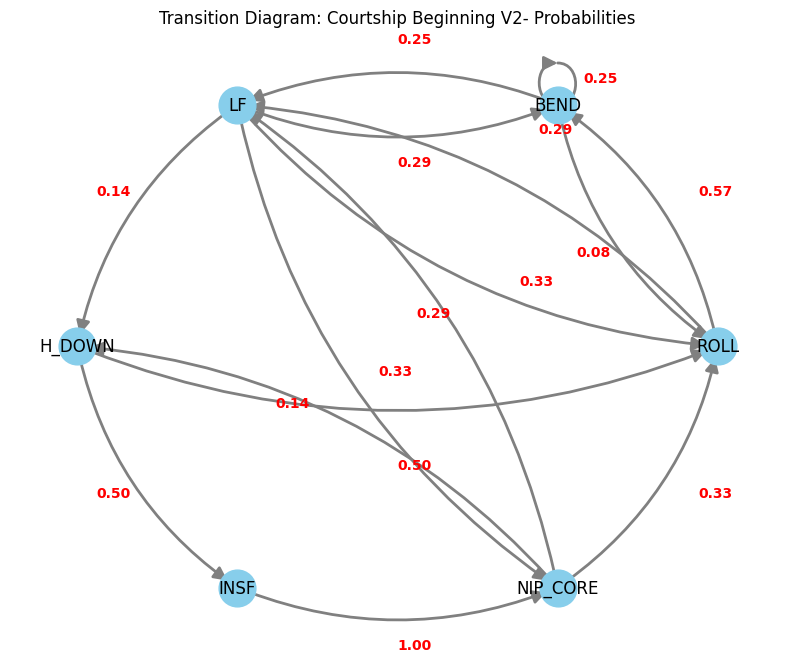

In [ ]:
# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    if u == v:
        # Se è un autoanello, posiziona l'etichetta leggermente sopra il nodo
        x_pos = pos_filtered[u][0] + 0.08
        y_pos = pos_filtered[u][1] + 0.08
    else:
        # Calcola la posizione media tra i nodi di partenza e di arrivo
        x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
        y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
        # Applica un offset maggiore per evitare sovrapposizioni con le frecce
        offset = 0.22
        x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
        y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])

    # Aggiungi l'etichetta al grafico
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
# Titolo del grafico
plt.title('Transition Diagram: Courtship Beginning V2- Probabilities')
plt.axis('off')  # Disattiva gli assi

#Save image
#plt.savefig(projectPath_save + '03Courtship_beginV2.png')
#plt.savefig(projectPath_save + '03Courtship_beginV2.pdf')
#plt.savefig(projectPath_save + '03Courtship_beginV2.svg')

# Mostra il grafico
plt.show()

**Nest_mantainance: NON ci sono sufficienti comportamenti di nest mantainance in questo video**

In [ ]:
#removing "['SA', 'NIP_OUT', 'BN', 'AM', 'LAND', 'MAN'] not in index"
Nest_mantainance = ['BN']

**Egg_care**

In [ ]:
#removing "['FAN', 'INS'] not in index"
Egg_care = ['INSF', 'NIP_CORE']

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Egg_care, Egg_care]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


          INSF  NIP_CORE
INSF       0.0       1.0
NIP_CORE   0.0       0.0


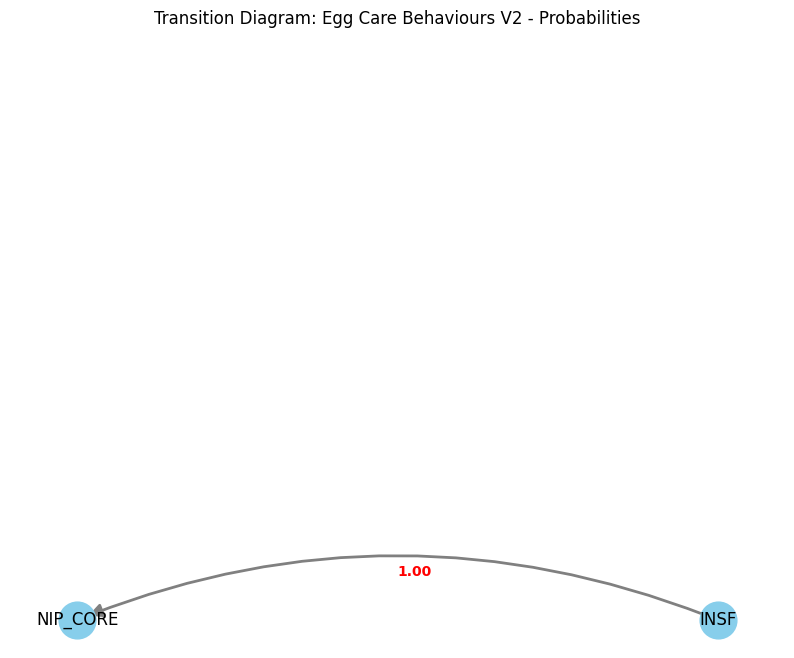

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.01
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Egg Care Behaviours V2 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '01Egg_careV2.png')
#plt.savefig(projectPath_save + '01Egg_careV2.pdf')
#plt.savefig(projectPath_save + '01Egg_careV2.svg')

# Mostra il grafico
plt.show()

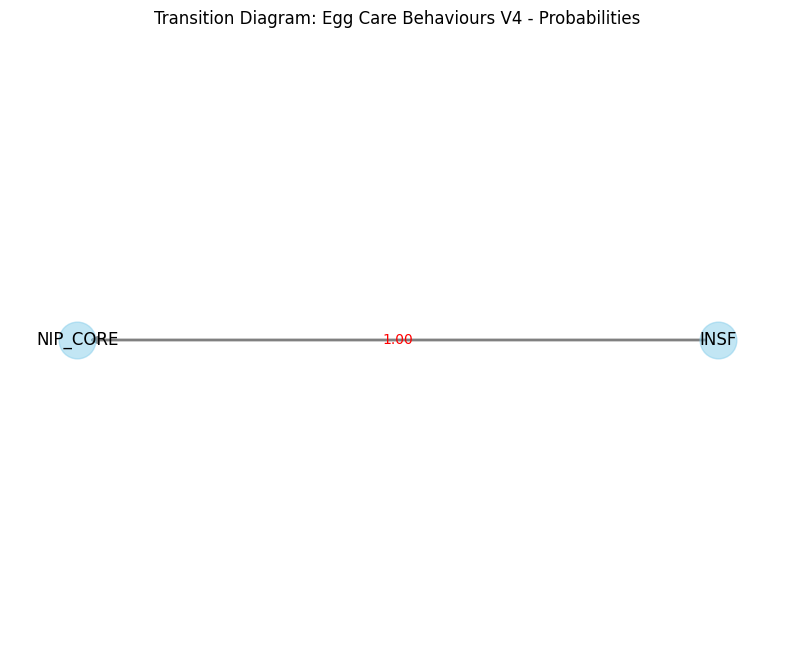

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')

# Titolo e visualizzazione del grafo
plt.title('Transition Diagram: Egg Care Behaviours V4 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '02Egg_careV4.png')
#plt.savefig(projectPath_save + '02Egg_careV4.pdf')
#plt.savefig(projectPath_save + '02Egg_careV4.svg')

# Mostra il grafico
plt.show()



**Agonism no beheviors in Video2**

In [ ]:
Agonism = ['CHA/flee', 'MAF']